In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./scraping/flipkart_reviews.csv")
df

,4,Nice 🤳📱📱
0,4,Super but camera bad 😞
1,3,Camera quality not ok
2,5,Camera 📸🤳 👍 good Battery 🔋 1.5 dayProcessor Go...
3,5,I love it mobile phone Good product
4,5,Good Mobile thanks Flipkart
...,...,...
46493,4,Good quality
46494,4,Great
46495,4,Thank u flipkart. The item is done with fabulo...
46496,4,Awesome


In [3]:
df.columns = ['rating' , 'review']

In [4]:
df

,rating,review
0,4,Super but camera bad 😞
1,3,Camera quality not ok
2,5,Camera 📸🤳 👍 good Battery 🔋 1.5 dayProcessor Go...
3,5,I love it mobile phone Good product
4,5,Good Mobile thanks Flipkart
...,...,...
46493,4,Good quality
46494,4,Great
46495,4,Thank u flipkart. The item is done with fabulo...
46496,4,Awesome


In [5]:
df.isnull().sum()

rating    0
review    0
dtype: int64

In [6]:
df.rating.value_counts()

1    18190
5    16522
4     6851
3     3193
2     1742
Name: rating, dtype: int64

In [7]:
df[df.duplicated()]

,rating,review
13,4,Good
69,5,Very good
70,5,Good
72,4,Nice
101,5,Super
...,...,...
46490,4,Good
46492,4,nice
46493,4,Good quality
46494,4,Great


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.rating.value_counts()

1    10665
5     7443
4     2957
3     1786
2     1143
Name: rating, dtype: int64

In [10]:
df.shape

(23994, 2)

In [11]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


In [12]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [13]:
def preprocess_nltk(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower().split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in stop_words]
    return ' '.join(review)

In [14]:
df['preprocessed_text'] = df['review'].apply(preprocess_nltk)

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
X = df['preprocessed_text']
y = df['rating']

In [18]:
X[20000] , y[20000]

('product good delivery service management poor staff behaviour rude', 1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import joblib
import tensorflow.keras as keras
import tensorflow as tf

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0 , stratify=y)

In [21]:
# y_train.value_counts() , y_test.value_counts()

(1    9598
 5    6699
 4    2661
 3    1607
 2    1029
 Name: rating, dtype: int64,
 1    1067
 5     744
 4     296
 3     179
 2     114
 Name: rating, dtype: int64)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import Counter
import numpy as np

In [25]:
# vectorizer = TfidfVectorizer(max_features=5000 , ngram_range=(1,3))  
# X_train_vec = vectorizer.fit_transform(X_train).toarray()
# X_test_vec = vectorizer.transform(X_test).toarray()

In [42]:
# joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [29]:
# classes = np.unique(y_train)
# class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
# class_weights_dict = dict(enumerate(class_weights))

# print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.44996874348822674, 1: 4.197084548104956, 2: 2.687492221530803, 3: 1.622998872604284, 4: 0.6446932377966861}


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [31]:
# y_train_zero_indexed = y_train - 1

***first***

-----------

In [34]:
# model = Sequential([
#     Dense(3000, input_shape=(5000,), activation="relu"),
#     Dense(1000, activation="relu"),
#     Dense(50, activation="relu"),
#     Dense(5, activation="softmax"),
# ])
# model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [40]:
# import tensorflow as tf
# with tf.device('/cpu:0'):
#     model.fit(X_train_vec, y_train_zero_indexed, epochs=20, class_weight=class_weights_dict, validation_split=0.2)


Epoch 1/20
540/540 [==============================] - 43s 79ms/step - loss: 1.2714 - accuracy: 0.5180 - val_loss: 1.0582 - val_accuracy: 0.5791
Epoch 2/20
540/540 [==============================] - 38s 71ms/step - loss: 0.9952 - accuracy: 0.6008 - val_loss: 1.0687 - val_accuracy: 0.5353
Epoch 3/20
540/540 [==============================] - 39s 73ms/step - loss: 0.6955 - accuracy: 0.7008 - val_loss: 1.1852 - val_accuracy: 0.5659
Epoch 4/20
540/540 [==============================] - 40s 73ms/step - loss: 0.4894 - accuracy: 0.7869 - val_loss: 1.4032 - val_accuracy: 0.5925
Epoch 5/20
540/540 [==============================] - 40s 74ms/step - loss: 0.3730 - accuracy: 0.8337 - val_loss: 1.6460 - val_accuracy: 0.5700
Epoch 6/20
540/540 [==============================] - 40s 74ms/step - loss: 0.3094 - accuracy: 0.8596 - val_loss: 1.9275 - val_accuracy: 0.6062
Epoch 7/20
540/540 [==============================] - 40s 74ms/step - loss: 0.2775 - accuracy: 0.8706 - val_loss: 2.1617 - val_accuracy:

In [41]:
# model.save('keras_model.h5')

In [43]:
# X_test_vectorized = vectorizer.transform(X_test).toarray()
# predictions = model.predict(X_test_vectorized)

In [44]:
# predictions

array([[9.99933124e-01, 5.32114900e-05, 1.27977671e-06, 2.45676439e-08,
        1.23695690e-05],
       [1.14785228e-03, 8.81825149e-01, 9.31456889e-05, 4.60819481e-03,
        1.12325668e-01],
       [9.61440965e-04, 9.96374428e-01, 2.77276558e-04, 2.37696851e-03,
        9.97218012e-06],
       ...,
       [1.01834377e-02, 8.68156314e-01, 2.79879551e-02, 8.52344483e-02,
        8.43787100e-03],
       [9.99897361e-01, 1.02649494e-04, 2.31854869e-10, 3.12822006e-17,
        1.12207433e-12],
       [5.33549814e-04, 9.99394774e-01, 4.97515430e-05, 2.08719339e-05,
        1.08328902e-06]], dtype=float32)

In [45]:
# predicted_classes = np.argmax(predictions, axis=1)
# predicted_ratings = predicted_classes + 1

# print(predicted_ratings)

[1 2 2 ... 2 1 2]


In [49]:
# np.unique(predicted_ratings)

array([1, 2, 3, 4, 5], dtype=int64)

In [46]:
# from sklearn.metrics import accuracy_score

# # Assuming y_test contains the true labels (ratings)
# accuracy = accuracy_score(y_test, predicted_ratings)
# print(f"Accuracy: {accuracy}")


Accuracy: 0.5683333333333334


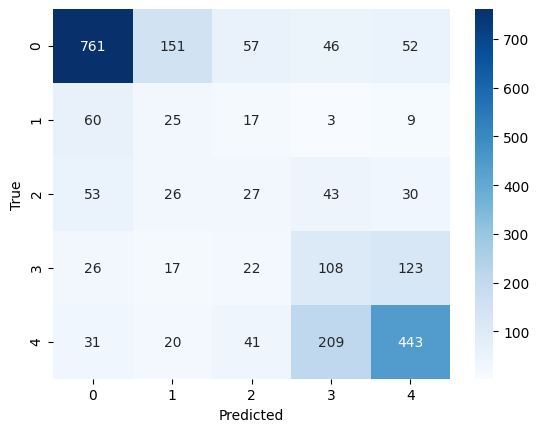

In [47]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Generate the confusion matrix
# conf_matrix = confusion_matrix(y_test, predicted_ratings)

# # Plot the confusion matrix
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


In [48]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, predicted_ratings))


              precision    recall  f1-score   support

           1       0.82      0.71      0.76      1067
           2       0.10      0.22      0.14       114
           3       0.16      0.15      0.16       179
           4       0.26      0.36      0.31       296
           5       0.67      0.60      0.63       744

    accuracy                           0.57      2400
   macro avg       0.40      0.41      0.40      2400
weighted avg       0.62      0.57      0.59      2400



***second***

----

In [61]:
# model = Sequential([
#     Dense(512, activation='relu', input_shape=(5000,)),
#     Dense(256, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(5, activation='softmax')  # 5 output classes
# ])


In [62]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [63]:
# with tf.device('/cpu:0'):
#     model.fit(X_train_vec, y_train_zero_indexed, epochs=20, class_weight=class_weights_dict, validation_split=0.2)

Epoch 1/20
540/540 [==============================] - 7s 12ms/step - loss: 1.4356 - accuracy: 0.5245 - val_loss: 1.1198 - val_accuracy: 0.5397
Epoch 2/20
540/540 [==============================] - 7s 13ms/step - loss: 1.1219 - accuracy: 0.5770 - val_loss: 0.9968 - val_accuracy: 0.5849
Epoch 3/20
540/540 [==============================] - 7s 13ms/step - loss: 0.9774 - accuracy: 0.6333 - val_loss: 1.0320 - val_accuracy: 0.5663
Epoch 4/20
540/540 [==============================] - 7s 13ms/step - loss: 0.8379 - accuracy: 0.6812 - val_loss: 1.0283 - val_accuracy: 0.5765
Epoch 5/20
540/540 [==============================] - 7s 13ms/step - loss: 0.6997 - accuracy: 0.7231 - val_loss: 1.1095 - val_accuracy: 0.5534
Epoch 6/20
540/540 [==============================] - 7s 13ms/step - loss: 0.5888 - accuracy: 0.7564 - val_loss: 1.0827 - val_accuracy: 0.5969
Epoch 7/20
540/540 [==============================] - 7s 13ms/step - loss: 0.5083 - accuracy: 0.7900 - val_loss: 1.2238 - val_accuracy: 0.5538

In [64]:
# predictions = model.predict(X_test_vectorized)
# predicted_classes = np.argmax(predictions, axis=1)
# predicted_ratings = predicted_classes + 1
# accuracy = accuracy_score(y_test, predicted_ratings)
# print(f"Accuracy: {accuracy}")

Accuracy: 0.5841666666666666


In [65]:
# model.save('keras_model2.h5')

***third***


---------------

In [36]:
# from tensorflow.keras.layers import LSTM, Embedding

# model = Sequential([
#     Embedding(input_dim=5000, output_dim=128, input_length=5000),  # Embedding layer
#     LSTM(64),
#     Dense(5, activation='softmax')  # 5 output classes
# ])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# with tf.device('/cpu:0'):
#     model.fit(X_train_vec, y_train_zero_indexed, epochs=10, class_weight=class_weights_dict, validation_split=0.2)

***fourth***

---------------------------------------

In [23]:
# vectorizer = TfidfVectorizer(max_features=6000 , ngram_range=(1,3))  
# X_train_vec = vectorizer.fit_transform(X_train).toarray()
# X_test_vec = vectorizer.transform(X_test).toarray()

In [33]:
# joblib.dump(vectorizer, 'tfidf_vectorizer1.pkl')

['tfidf_vectorizer1.pkl']

In [24]:
# model = Sequential([
#     Dense(3000, activation='relu', input_shape=(6000,)),
#     Dense(1500, activation='relu'),
#     Dense(625, activation='relu'),
#     Dense(5, activation='softmax')  # 5 output classes
# ])


In [25]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# with tf.device('/cpu:0'):
#     model.fit(X_train_vec, y_train_zero_indexed, epochs=15, class_weight=class_weights_dict, validation_split=0.2)

Epoch 1/15
540/540 [==============================] - 50s 93ms/step - loss: 1.3050 - accuracy: 0.5194 - val_loss: 1.0875 - val_accuracy: 0.5402
Epoch 2/15
540/540 [==============================] - 51s 94ms/step - loss: 0.9898 - accuracy: 0.6140 - val_loss: 1.0552 - val_accuracy: 0.5233
Epoch 3/15
540/540 [==============================] - 50s 93ms/step - loss: 0.6973 - accuracy: 0.7197 - val_loss: 1.1214 - val_accuracy: 0.5423
Epoch 4/15
540/540 [==============================] - 50s 93ms/step - loss: 0.4718 - accuracy: 0.8046 - val_loss: 1.2007 - val_accuracy: 0.6048
Epoch 5/15
540/540 [==============================] - 51s 94ms/step - loss: 0.3680 - accuracy: 0.8413 - val_loss: 1.3215 - val_accuracy: 0.6092
Epoch 6/15
540/540 [==============================] - 50s 93ms/step - loss: 0.3144 - accuracy: 0.8644 - val_loss: 1.4755 - val_accuracy: 0.5960
Epoch 7/15
540/540 [==============================] - 52s 96ms/step - loss: 0.2892 - accuracy: 0.8704 - val_loss: 1.5508 - val_accuracy:

In [34]:
# model.save('keras_model1.h5')

In [35]:
# predictions = model.predict(X_test_vec)
# predicted_classes = np.argmax(predictions, axis=1)
# predicted_ratings = predicted_classes + 1
# accuracy = accuracy_score(y_test, predicted_ratings)
# print(f"Accuracy: {accuracy}")

Accuracy: 0.5766666666666667


***Fifth***

-----------------------------------------------------------------------------------------------

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
df['sentiment'] = df['rating'].apply(lambda x: 0 if x in (1,2) else (1 if x==3 else 2))

In [38]:
X = df['preprocessed_text']
y = df['sentiment']

In [44]:
y.value_counts()

0    11808
2    10400
1     1786
Name: sentiment, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0, stratify=y)

In [41]:
vectorizer = TfidfVectorizer(max_features=6000 , ngram_range=(1,3))  
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

In [50]:
joblib.dump(vectorizer, 'tfidf_vectorizer_s.pkl')

['tfidf_vectorizer_s.pkl']

In [42]:
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vec, y_train)

In [43]:
print("Class distribution after SMOTE:", np.bincount(y_train_smote))

Class distribution after SMOTE: [10627 10627 10627]


In [45]:
model = Sequential([
    Dense(3000, activation='relu', input_shape=(6000,)),
    Dense(1500, activation='relu'),
    Dense(625, activation='relu'),
    Dense(5, activation='softmax')  # 5 output classes
])

In [46]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
with tf.device('/cpu:0'):
    model.fit(X_train_smote, y_train_smote, epochs=15,  validation_data=(X_test_vec, y_test))

Epoch 1/15
997/997 [==============================] - 90s 90ms/step - loss: 0.3691 - accuracy: 0.8638 - val_loss: 0.5738 - val_accuracy: 0.8050
Epoch 2/15
997/997 [==============================] - 90s 90ms/step - loss: 0.2469 - accuracy: 0.9094 - val_loss: 0.6437 - val_accuracy: 0.8313
Epoch 3/15
997/997 [==============================] - 92s 92ms/step - loss: 0.1967 - accuracy: 0.9256 - val_loss: 0.7454 - val_accuracy: 0.8046
Epoch 4/15
997/997 [==============================] - 672s 674ms/step - loss: 0.1693 - accuracy: 0.9329 - val_loss: 0.7802 - val_accuracy: 0.8250
Epoch 5/15
997/997 [==============================] - 380s 381ms/step - loss: 0.1540 - accuracy: 0.9363 - val_loss: 0.8138 - val_accuracy: 0.7996
Epoch 6/15
997/997 [==============================] - 326s 327ms/step - loss: 0.1418 - accuracy: 0.9394 - val_loss: 0.8602 - val_accuracy: 0.7933
Epoch 7/15
997/997 [==============================] - 378s 379ms/step - loss: 0.1337 - accuracy: 0.9427 - val_loss: 0.9732 - val_a

In [49]:
model.save('keras_model_s.h5')

In [52]:
predictions = model.predict(X_test_vec)
predicted_classes = np.argmax(predictions, axis=1)
predicted_ratings = predicted_classes 
accuracy = accuracy_score(y_test, predicted_ratings)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8108333333333333


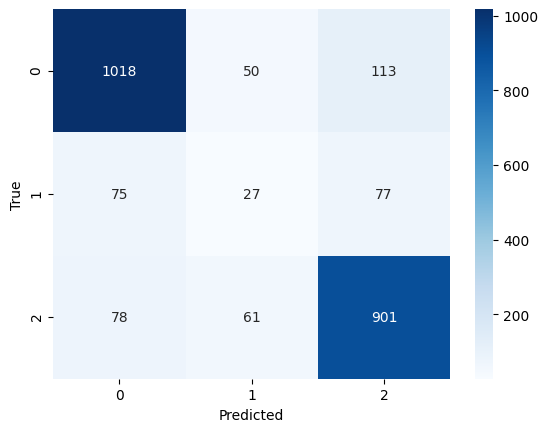

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_ratings)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_ratings))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1181
           1       0.20      0.15      0.17       179
           2       0.83      0.87      0.85      1040

    accuracy                           0.81      2400
   macro avg       0.63      0.63      0.63      2400
weighted avg       0.80      0.81      0.81      2400



In [65]:
import gc
gc.collect()

1483

In [35]:
from tensorflow.keras import backend as K
K.clear_session()
